# **Escuela Politécnica Nacional**
## **[Tarea 05] Ejercicios Unidad 02 B Método de Newton y de la Secante**
### **Nombre:** Sebastián Morales
### **Fecha:** 15/05/2025
### **Curso:** GR1CC 

### **Repositorio:**


**CONJUNTO DE EJERCICIOS**

**1. Sea**

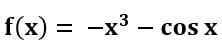

**y 𝑝_0=−1. Use el método de Newton y de la Secante para encontrar 𝑝_2. ¿Se podría usar 𝑝_0=0?**

**Método de Newton**

In [19]:
import numpy as np

# Definición de la función y su derivada
def f(x):
    return -x**3 - np.cos(x)

def g(x):
    return -3*x**2 + np.sin(x)

# Método de Newton
def newton(p0, max_iter=2):
    p = p0
    for i in range(max_iter):
        p = p - f(p)/g(p)
        print(f"Iteración {i+1}: p_{i+1} = {p:.6f}")
    return p
# Punto inicial
p0 = -1


**Método de la Secante**

In [20]:
# Método de la Secante
def secante(p0, p1, max_iter=2):
    for i in range(max_iter):
        p2 = p1 - f(p1)*(p1 - p0)/(f(p1) - f(p0))
        print(f"Iteración {i+1}: p_{i+2} = {p2:.6f}")
        p0, p1 = p1, p2
    return p2


In [25]:
print("Método de Newton:")
p2_newton = newton(p0)
print(f"\nValor final con Newton: p_2 = {p2_newton:.6f}\n")

print("Método de la Secante:")
p1_newton = newton(p0, max_iter=1)
p2_secant = secante(p0, p1_newton)
print(f"\nValor final con Secante: p_2 = {p2_secant:.6f}\n")

Método de Newton:
Iteración 1: p_1 = -0.880333
Iteración 2: p_2 = -0.865684

Valor final con Newton: p_2 = -0.865684

Método de la Secante:
Iteración 1: p_1 = -0.880333
Iteración 1: p_2 = -0.867235
Iteración 2: p_3 = -0.865499

Valor final con Secante: p_2 = -0.865499



In [24]:
# Verificación para Secante con p0 = 0
print("\nPrueba con Secante usando p0 = 0 y p1 = -0.5:")
secant_p0_0 = secante(0, -0.5)
print("Sí se puede usar p0 = 0 en el método de la Secante si elegimos un p1 adecuado")


Prueba con Secante usando p0 = 0 y p1 = -0.5:
Iteración 1: p_2 = -2.020876
Iteración 2: p_3 = -0.621239
Sí se puede usar p0 = 0 en el método de la Secante si elegimos un p1 adecuado


**2. Encuentre soluciones precisas dentro de 10^(-4) para los siguientes problemas.**

In [11]:
import math
# Definición de funciones para el método de Newton y la Secante
def newton_2(f, df, x0, tol=1e-4, max_iter=100):
    for i in range(max_iter):
        fx = f(x0)
        dfx = df(x0)
        if abs(fx) < tol:
            return x0, i+1
        if dfx == 0:
            raise ValueError("Derivada cero. No se puede continuar.")
        x1 = x0 - fx/dfx
        if abs(x1 - x0) < tol:
            return x1, i+1
        x0 = x1
    raise ValueError("El método no convergió después de {} iteraciones.".format(max_iter))

def secante_2(f, x0, x1, tol=1e-4, max_iter=100):
   
    for i in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)
        if abs(fx1) < tol:
            return x1, i+1
        if fx1 - fx0 == 0:
            raise ValueError("División por cero. No se puede continuar.")
        x2 = x1 - fx1*(x1 - x0)/(fx1 - fx0)
        if abs(x2 - x1) < tol:
            return x2, i+1
        x0, x1 = x1, x2
    raise ValueError("El método no convergió después de {} iteraciones.".format(max_iter))

**a.**

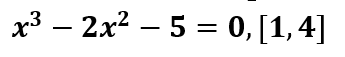

In [ ]:

def fa(x): 
    return x**3 - 2*x**2 - 5
def dfa(x): 
    return 3*x**2 - 4*x

solucion_a_S, iter_a_secante = secante_2(fa, 1, 4)
print(f"Solución: {solucion_a_S:.6f} \nIteraciones: {iter_a_secante}")


Solución: 2.690648 
Iteraciones: 10


**b.**

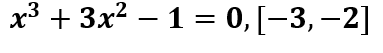

In [ ]:
def fb(x): 
    return x**3 + 3*x**2 - 1
def dfb(x): 
    return 3*x**2 + 6*x

sol_b, iter_b = newton_2(fb, dfb, -2.5)
print(f"Solución: {sol_b:.6f} \nIteraciones: {iter_b}")

Solución: -2.879385 
Iteraciones: 5


**c.**

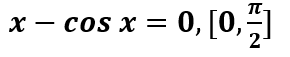

In [ ]:
def fc(x): 
    return x - math.cos(x)
def dfc(x): 
    return 1 + math.sin(x)

sol_c_sec, iter_c_sec = secante_2(fc, 0, math.pi/2)
print(f"Solución: {sol_c_sec:.6f} \nIteraciones: {iter_c_sec}")

Solución: 0.739083 
Iteraciones: 5


**d.**

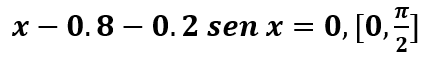

In [ ]:
def fd(x): 
    return x - 0.8 - 0.2*math.sin(x)
def dfd(x): 
    return 1 - 0.2*math.cos(x)

sol_d_sec, iter_d_sec = secante_2(fd, 0, math.pi/2)
print(f"Solución: {sol_d_sec:.6f} \nIteraciones: {iter_d_sec}")

Solución: 0.964346 
Iteraciones: 4


**3. Use los 2 métodos en esta sección para encontrar las soluciones dentro de 10^(-5) para los siguientes problemas.**

**a.**

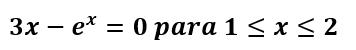

In [38]:
def f3a(x): 
    return 3*x - math.exp(x)
def df3a(x): 
    return 3 - math.exp(x)

print("Método de Newton:")
solucion_a_N, iter_a_newton = newton_2(f3a, df3a, 1.5, tol=1e-5)
print(f"Solución: {solucion_a_N:.8f} \nIteraciones: {iter_a_newton}")

print("\nMétodo de la Secante:")
solucion_a_S, iter_a_secante = secante_2(f3a, 1, 2, tol=1e-5)
print(f"Solución: {solucion_a_S:.8f} \nIteraciones: {iter_a_secante}")

Método de Newton:
Solución: 1.51213463 
Iteraciones: 3

Método de la Secante:
Solución: 1.51213398 
Iteraciones: 9


**b.**

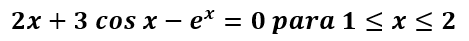

In [39]:
def f3b(x): 
    return 2*x + 3*math.cos(x) - math.exp(x)
def df3b(x): 
    return 2 - 3*math.sin(x) - math.exp(x)

print("Método de Newton:")
solucion_a_N, iter_a_newton = newton_2(f3b, df3b, 1.5, tol=1e-5)
print(f"Solución: {solucion_a_N:.8f} \nIteraciones: {iter_a_newton}")

print("\nMétodo de la Secante:")
solucion_a_S, iter_a_secante = secante_2(f3b, 1, 2, tol=1e-5)
print(f"Solución: {solucion_a_S:.8f} \nIteraciones: {iter_a_secante}")

Método de Newton:
Solución: 1.23971478 
Iteraciones: 4

Método de la Secante:
Solución: 1.23971469 
Iteraciones: 6


**4. El polinomio de cuarto grado**

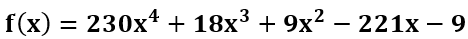

**Tiene dos ceros reales, uno en [-1,0] y el otro en [0,1]. Intente aproximar estos ceros dentro de 10^(-6) con**

**a. El método de la secante (use los extremos como las estimaciones iniciales)**

In [41]:
# Definición de la función 
def f4(x):
    return 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9

print("Método de la Secante:")
# Raíz en [-1, 0]
solucion4, iter_solucion4 = secante_2(f4, -1, 0, tol=1e-6)
print(f"Raíz en [-1, 0]: {solucion4:.8f}, Iteraciones: {iter_solucion4}")
# Raíz en [0, 1]
solucion4_2, iter_solucion4_2 = secante_2(f4, 0, 1, tol=1e-6)
print(f"Raíz en [0, 1]: {solucion4_2:.8f}, Iteraciones: {iter_solucion4_2}")

Método de la Secante:
Raíz en [-1, 0]: -0.04065929, Iteraciones: 4
Raíz en [0, 1]: -0.04065929, Iteraciones: 11


**b. El método de Newton (use el punto medio como la estimación inicial)**

In [44]:
# Definición de la función y su derivada
def f4(x):
    return 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9

def df4(x):
    return 920*x**3 + 54*x**2 + 18*x - 221

print("Método de Newton:")
# Raíz en [-1, 0]
solucion_4b, iter_4b = newton_2(f4, df4, -0.5, tol=1e-6)
print(f"Raíz en [-1, 0]: {solucion_4b:.8f}, Iteraciones: {iter_4b}")
# Raíz en [0, 1]
solucion_4b_2, iter_4b_2 = newton_2(f4, df4, 0.5, tol=1e-6)
print(f"Raíz en [0, 1]: {solucion_4b_2:.8f}, Iteraciones: {iter_4b_2}")

Método de Newton:
Raíz en [-1, 0]: -0.04065929, Iteraciones: 4
Raíz en [0, 1]: -0.04065929, Iteraciones: 6


**5. La función**

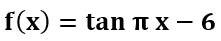

**tiene cero en (1/π) arcotangente 6 ≈0.447431543. Sea p_o=0 y p_1=0.48 y use 10 iteraciones en cada uno de los siguientes métodos para aproximar esta raíz. ¿Cuál método es más eficaz y por qué?**

**a. Método de bisección**

In [48]:
# Definición de la función 
def f_tan(x):
    return math.tan(math.pi * x) - 6

# Método de bisección (nuevo método a añadir)
def biseccion(f, a, b, max_iter=10):

    if f(a) * f(b) >= 0:
        raise ValueError("La función debe cambiar de signo en el intervalo [a, b]")
    
    for i in range(max_iter):
        c = (a + b) / 2
        if f(c) == 0:
            return c, 0
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2, abs(b - a)

# Puntos iniciales
p0 = 0
p1 = 0.48

print("Método de Bisección:")
sol_bisec, error_bisec = biseccion(f_tan, p0, p1, max_iter=10)
print(f"Solución: {sol_bisec:.9f} \nError estimado: {error_bisec:.2e}")

Método de Bisección:
Solución: 0.447421875 
Error estimado: 4.69e-04


**b. Método de Newton**

In [20]:
# Definición de la derivada de la función tangente
def df_tan(x):
    return math.pi / (math.cos(math.pi * x))**2

# Versión modificada del método de Newton para evitar singularidades
def newton_mod(f, df, x0, tol=1e-6, max_iter=100, safe_range=(0, 0.5)):
    for i in range(max_iter):
        try:
            fx = f(x0)
            if abs(fx) < tol:
                return x0, i+1
            dfx = df(x0)
            if dfx == 0:
                raise ValueError("Derivada cero")
            x1 = x0 - fx/dfx
            # Verificar que no salga del rango seguro
            if x1 <= safe_range[0] or x1 >= safe_range[1]:
                x1 = (safe_range[0] + safe_range[1])/2  # Reajustar al centro
            if abs(x1 - x0) < tol:
                return x1, i+1
            x0 = x1
        except:
            # Si hay error (singularidad), reajustar el punto
            x0 = (safe_range[0] + safe_range[1])/2
    return x0, max_iter

# Puntos iniciales
x0_newton = p1  # Para Newton usamos p1 como estimación inicial

print("Método de Newton:")
sol_newton, iter_newton = newton_mod(f_tan, df_tan, x0_newton, tol=0, max_iter=10)
print(f"Solución: {sol_newton:.9f} alcanzada en {iter_newton} iteraciones")

Método de Newton:
Solución: 0.447431543 alcanzada en 10 iteraciones


**c. Método de la secante**

In [24]:
# Versión modificada del método de la secante
def secante_mod(f, x0, x1, tol=1e-6, max_iter=100, safe_range=(0, 0.5)):
    for i in range(max_iter):
        try:
            fx0 = f(x0)
            fx1 = f(x1)
            if abs(fx1) < tol:
                return x1, i+1
            if fx1 - fx0 == 0:
                x2 = (x0 + x1)/2
            else:
                x2 = x1 - fx1*(x1 - x0)/(fx1 - fx0)
            # Verificar que no salga del rango seguro
            if x2 <= safe_range[0] or x2 >= safe_range[1]:
                x2 = (safe_range[0] + safe_range[1])/2
            if abs(x2 - x1) < tol:
                return x2, i+1
            x0, x1 = x1, x2
        except:
            # Si hay error (singularidad), reajustar los puntos
            x0, x1 = safe_range[0], safe_range[1]
    return x1, max_iter

print("Método de la Secante:")
sol_sec, iter_sec = secante_mod(f_tan, p0, p1, tol=0, max_iter=10)
print(f"Solución: {sol_sec:.9f} alcanzada en {iter_sec} iteraciones")

Método de la Secante:
Solución: 0.250000000 alcanzada en 10 iteraciones
